# DevFest Dublin 2019 - Tensorflow and Keras - Part II

author: [@laura_uzcategui](https://twitter.com/laura_uzcategui)<br />
credits to: [Laurence Moroney](https://twitter.com/lmoroney), borrowed images and functions from his Tensorflow in Practice course.

On this workshop you will learn a bit more about Machine Learning in general and you will build a model that will help you grasp the following: 

The workshop is divided in 2 sections, one for tackling the basics and to get you started in tensorflow and keras and the second part where we will be building a Convolutional Neural Net to build an image classifier

**Part I**
1. Basics of Tensorflow and Keras
2. How to build a model 
3. What are Optimizer and Loss functions and why you need them?
4. You will train a Model and get predictions 

**Part II**
5. Preprocessing your data
    1. Obtain your data
    2. Load your data using image generator 
    3. Explore your data
6. Image classification and Neural Networks
    1. Build a model 
    2. Configure 
    3. Train your model
    4. Test it :)

Bonus points: If we have time, we will go through an explanation of Data Augmentation

Now that you have learned how to create Models using Tensorflow and Keras, I thought you might like to learn something new and do a bit of a deep dive into the features that Tensorflow offers in order to make your life easier and to be happier when working with Models.

Our previous model was just based on predicting numbers and yeah it was cool, but we want do Cooler stuff, so what about building an Image Classifier? In this case we will use Supervised Learning.

Ok, let's get this started by obtaining our data





In [1]:
# Let's install tensorflow 2.x first :)
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
import numpy as np

# Preprocessing your data 



### Obtain your data :)

Whenever we are working with Machine Learning, we need something to feed the model with and that something is **data**. Data is your most valuable currency when you are working with ML. 

In this case, we will build a classifier to determine if the image is a dog or a cat. 

We will use an small version of cats-vs-dogs dataset from the original Kaggle competition: https://www.kaggle.com/c/dogs-vs-cats

Colab is linked to your drive folder, lets check the current path and do a list over that path 

When you want to execute commands as if you were on the terminal, you prefix the command with ```!```. Useful command for debugging or using linux tools.

In [9]:
 # What is our current working directory
 !pwd

/content


In [10]:
# list the files in the current directory 
!ls


sample_data  test_6.jpg


**Activity:** Try to obtain the dataset by using the following information:

- dataset link: https://storage.googleapis.com/devfest-ml/cats_and_dogs_filtered.zip
- path to store dataset: **/content/cats_and_dogs_filtered.zip**

Use the command `wget [DATASET] -O [PATH_TO_STORE_DATASET]`

In [3]:
# Obtain your dataset :) 
dataset="https://storage.googleapis.com/devfest-ml/cats_and_dogs_filtered.zip"
store_path="/content/cats_and_dogs_filtered.zip"
!wget $dataset -O $store_path

--2019-11-17 18:57:55--  https://storage.googleapis.com/devfest-ml/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 2607:f8b0:400e:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/content/cats_and_dogs_filtered.zip’

/content/cats_and_d 100%[===================>]  65.43M  68.1MB/s    in 1.0s    

2019-11-17 18:57:57 (68.1 MB/s) - ‘/content/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [4]:
!ls

cats_and_dogs_filtered.zip  sample_data


As we don't have too much time, I've prepared some functions you can use to extract your data and start working with it straight away.

In [0]:
import os
import zipfile

BASE_PATH = '/content/'

def extract_dataset(fullpath):
  ''' will extract the dataset on the fullpath 
      to the BASE_PATH defined
      Args:
        fullpath (str): full path name to the zip file
  '''
  
  zip_ref = zipfile.ZipFile(fullpath, 'r')
  zip_ref.extractall(BASE_PATH)
  zip_ref.close()

In [0]:
# Extract the dataset 
# replace DATASET_ZIPFILE for the actual zip filename
extract_dataset(store_path)

In [8]:
# Check the content of the folder 
!ls /content/cats_and_dogs_filtered/*  

/content/cats_and_dogs_filtered/vectorize.py

/content/cats_and_dogs_filtered/train:
cats  dogs

/content/cats_and_dogs_filtered/validation:
cats  dogs


### Load your data using image generator 

---

Now let's talk on your folder structure and why it is important to know it :) 

Whenever we are working with ML, a really good practice and something you should always aim from the very beginning is, once you have your data, you need to partition it in two: 

- Training set: data used for training your model 
- Validation set: will be used after training is complete to test that your model is performing well and making predictions correctly.

There are multiple ways to do this, currently ML / Data Science libraries provide you with a set of tools / methods or classes to do it. 

For example: 

- Scikit has the following: [Train test split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), which will split randomly the dataset for you.
- Tensorflow + Keras have superpowers and it provides you a tool called [Image Data Generator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator), which allows you to: 

Tensorflow + Keras have superpowers and they provide you with a tool called Image Data Generator, which allows you to:
  - Load the data from a source ( folder, dataframe ) 
  - Label the data for you 
  - Normalize data before feeding it to the model
  - Augment data 

 This is a really good tool and I would recommend you to learn how to use it, as you will save a lot of time. 
 
 Now Let's try to use these superpowers to label the data for us and loaded as tensors. 

<div align="middle">
<img src="https://storage.googleapis.com/devfest-ml/superhero.png" width="70"/>
</div>

As we want to use the Image Data Generator, the directory structure has to look like this: 

<div align="middle"><img src="https://storage.googleapis.com/devfest-ml/dir_structure.png" width="400"/></div>
  
  - dataset directory 
  - 2 subdirectories for training and validation
  - Inside ( training / validation) , a directory for each class. 

  In this case we have 2 classes, cats and dogs. 

  Now let's go and create our Data Generators. 

  Example Code: 

  ```
  datagen = ImageDataGenerator(....) 
  ```

Tip: when working on Machine Learning, your data should be normalized before feeding it into the model. 

As we are feeding images, each image will be read as a pixel with a range from 0 to 255 ( black to white ) and we need to normalize it to be either 0 or 1 ,as neural nets prefer to work with small values. 

Hint: use the rescale parameter. 

**Activity:**:
- Go back to work and create to data generators, 1 for training and one for validation.

Hint: you might need to do imports

- Checkout how to import the [ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator): 

Hint: `from tf.keras.... import ImageDataGenerator`

In [0]:
# Import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
# Create a training data generator 
training_datagen = ImageDataGenerator(rescale=1.0/255.)

In [0]:
# Create a validation data generator 
validation_datagen = ImageDataGenerator(rescale=1.0/255.)

Once we have created our generators, we need now to load the data, and we can do this by using [flow_from_directory](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow_from_directory) method, which will take an input directory and will load it into a tensor we could use. 


Once we have created our generators, we then need to load the data, and we can do this by using flow_from_directory method, which will take an input directory and will load it into a tensor which we can use.



**Activity:** Let's load the data by creating 2 generators for training and validation, you need to provide: 

- Directory to load the data ( tip: create variables pointing to the dirs) 
- Dimension of the images (150 x 150 pixels),
- Batch size, size of the batches of data, will load the data in batches of the amount specified at the time. 
- The class mode should be binary, as we are only defining between cats or dogs.

Example: 

```
 datagenerator.flow_from_directory(....) 
```

In [0]:
# Define the training and validation directories
training_dir="/content/cats_and_dogs_filtered/train"
validation_dir="/content/cats_and_dogs_filtered/validation"

In [14]:
# Create the training generator 
# Remember to call it with the data generator you created above and the right directory :) 
img_size = (150,150)
batch_size = 32
binary_class = 'binary'

training_generator = training_datagen.flow_from_directory(directory=training_dir,
                                     target_size=img_size,
                                     batch_size=batch_size,
                                     class_mode=binary_class)

Found 2000 images belonging to 2 classes.


In [15]:
# Create the validation generator 
# Remember to call it with the data generator you created above and the right directory :) 
validation_generator = validation_datagen.flow_from_directory(directory=validation_dir,
                                     target_size=img_size,
                                     batch_size=batch_size,
                                     class_mode=binary_class)

Found 1000 images belonging to 2 classes.


## Explore your data 


---


Let's see how our data looks like :) 

I have created a function for you (borrowed from a course content) , you just need to add few lines of code and we will see a grid of images. 

If you would like to learn more about how to plot images with matplot lib take a look to : [Subplots](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html) 

In [0]:
# we need to import matplotlib :)
import matplotlib.pyplot as plt

def plotImages(array_of_images):
    # We define a plot of 2 rows and 4 columns of images
    fig, axes = plt.subplots(2, 4, figsize=(10,10))
    # iterate over each image and (row,col)
    for img, ax in zip( array_of_images, axes.flat):
        # show the image on the right axis
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Now we need to use the function along with the generator we created above for training to get a batch of images we can use :)

But first we need to extract a batch of images and you can do it by using next on the training generator
```
next(train_data_gen)
```

This will return a tuple with an array with a batch of images and labels. For now we are interested in keeping the images, so when declaring the array, be sure to ignore the labels.

**Activity**: 
- Declare a variable to receive your images 
- Call the function above indexing the array like this `array_name[:8]` as you only want the first 8 :) 

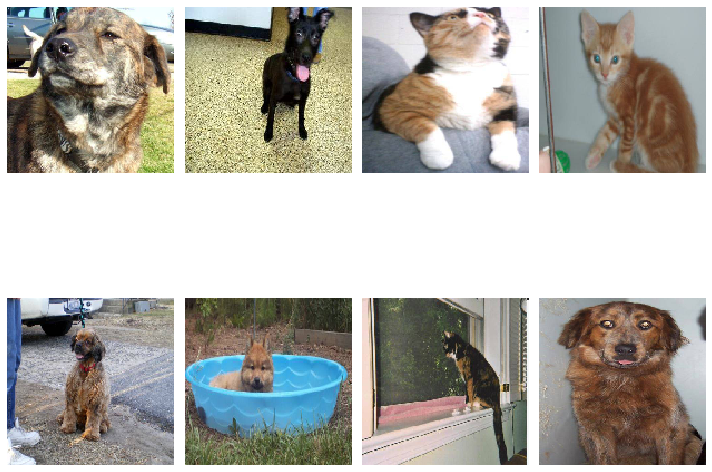

In [17]:
# Declare an object (array) to receive your images
batch_images, _ = next(training_generator)
# Call the plotImages with the object you just declared 
plotImages(batch_images[:8])
# Output should be a 2 by 4 grid full of images


# Image Classification and Neural Networks 

Let's start by working through a few concepts, then will move on to practice.

Do you remember when you were younger and notifications pop up in your social media about you appearing in a photo and then you totally panic because it could be actually your worst photo ever?


<div align="middle">
<img src="https://storage.googleapis.com/devfest-ml/drunk.jpg" width=180> 
</div>

Well, that actually happened thanks to image classification and computer vision techniques that effectively allow the algorithm ( model ) to detect it was you and put a tag ( label ) on the picture. 

To go into more detail, the core of image recognition is produced by **Convolutional Neural Networks (CNNs)**. 

The idea behind CNNs is that it can *Detect patterns* on the image by using Filters, practically speaking it can detect features as the filter is passed over the image. 

When you do image processing you can use filters ( kernels ) to change the image and perform activities like: 

- Edge detection 
- Sharpening 
- Blurring 

As you are passing the filter over the image, you condense the image down to the important features. 

All of these is done thanks to the magic of [Convolutions](https://en.wikipedia.org/wiki/Convolution), which mathematically speaking is a math operation over 2 functions that produces another function that explains how the shape of one of the functions is modified by the other one. 

Phew that was difficult to explain, but check out the following 2 images :) and you will get a better understanding. 

<div align="middle">
<img src="https://storage.googleapis.com/devfest-ml/filter.gif" width=180> 
</div>

As your filter pass over the image, what it is really doing is producing new images emphasizing the features. 

<div align="middle">
<img src="https://storage.googleapis.com/devfest-ml/edge_detection.gif" width=400> 
</div>

Yet another concept that is really useful to understand is that after passing the filter and getting the features emphasized we might want also to apply Max Pooling, which is a way to compress the image with the pixels that are more relevant on the image. 

**How does MaxPooling works?**

- From a group of pixels from the image
- You take the biggest
- Keep it :) 

Checkout the animation below to understand it

<div align="middle">
<img src="https://storage.googleapis.com/devfest-ml/maxpool.gif" width=400> 
</div>

If you are curious to do a deep dive on how the convolutional neural networks are created, checkout this lecture from Standford:[ http://cs231n.github.io/convolutional-networks/](http://cs231n.github.io/convolutional-networks/)

### Ok, that's enough theory, show me this running :) 
---



## Build your first Convolutional Neural Net 

Do you remember the **pancakes** from the first section ? Now it's time to use them again. 

This time we will create a Sequential model, using 3 different classes for building layers in Tensorflow. 

- [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D): will create a layer with convolutions and will produce a tensor output 
- [MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D): it will downsample our tensor, specifying a pool size
- [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten): will flatten the input into tensor that will be feeding the DNN

In the snippet below you can see how a CNN could be created.

```
model = Sequential([
    Conv2D(16, 3, activation='relu', input_shape=(28,28,3)),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])
```

**Activity**: now let's try to create your own CNN with the following requirements: 

- 3 Conv2D Layers, the first one needs `input_shape` as parameter, with the size of your image as you specified on the training generator with 3 channels to say it's a color photo , and **relu** activation
- 3 Max Pooling Layers 
- 1 Flatten layer 
- 2 Dense layers:
  - First layer with 512 units, and relu activation
  - Final layer with only 1 output unit and using the **sigmoid** activation function

Checkout this video about what [Activation Functions](https://www.youtube.com/watch?v=m0pIlLfpXWE) are, specifically there is a good explanation for relu (Rectified Linear Unit) and Sigmoid. 


In [0]:
# Create your CNN here :) 

relu = tf.nn.relu

model = tf.keras.models.Sequential([
     tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation=relu, input_shape=(150,150,3)),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation=relu),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation=relu),
     tf.keras.layers.MaxPooling2D(),  
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(units=512, activation=relu),
     tf.keras.layers.Dense(units=1, activation='sigmoid')   

])


One cool way to check how your model looks like is by using [Summary](https://www.tensorflow.org/api_docs/python/tf/keras/Model#summary/) method. 

The summary method gives you an overview over the layers, how many parameters is on each layer and how many are passing to the next.

Try it out below


In [19]:
# Summary - uncomment the line below 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

## Configure your Model 

**Activity**: let's go and try to configure your model as you did on the previous section with the following parameters:

- Use [RMSProp](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/RMSprop) as Optimizer , with a learning rate of : 0.0001
- Use a loss function: [Binary cross entropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/binary_crossentropy), this function will help you to measure the probability of the prediction being of certain class 

Binary cross entropy loss is a loss function commonly used for binary classification. If you want to better understand how cross entropy works and how it relates to this function, I would encourage you to watch this nice video from [A Short Introduction to Entropy, Cross-Entropy and KL-Divergence](https://www.youtube.com/watch?v=ErfnhcEV1O8) by [Aurelien Geron](https://twitter.com/aureliengeron)

In [0]:
## Configure your model here :) 
l_rate=0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=l_rate), 
              loss=tf.losses.BinaryCrossentropy(),
              metrics=['acc'])

## Training your Model - nearly there :-)

Now we finally get to the real deal, as we will be training our Model to classify pictures between cats and dogs. 

As you will be training the model, we need to use [fit_generator](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit_generator) method which will actually use the training generator we have created above on the Data Processing.

**fit_generator** will train the model on a batch by batch fashion as you will be using the training generator.

This runs in parallel to training the model, this means that meanwhile is doing training on GPU is also doing Data Augmentation on CPU. 

We won't be doing any data augmentation in the workshop, but If you are curious about it and how it could help to improve your model accuracy, I'll recommend you to watch [this](https://www.youtube.com/watch?v=JI8saFjK84o) explanation from the [Deep Learning specialization by deeplearning.ai](https://www.deeplearning.ai/deep-learning-specialization/)

Checkout the fit_generator snippet and try to build your own: 

```
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size, 
    verbose=0 or 1 or 2
)
```

Arguments: 
- **steps_per_epoch and validation_steps**: will be tipically the total amount of samples in your training/validation generator divided by the batch size you defined when working on the generator
- **epochs**: the number of iterations you are going to do training.

**Activity**: 

Train your CNN by passing the following arguments: 

- Your training and validation generator defined previously
- Use 15 epochs 
- Verbose set to 2 ( so we can see the progress ) 
- Calculate your validation_steps and steps_per_epoch accordingly (dataset_size / batch_size) 

In [22]:
training_size = len(training_generator.classes)
validation_size = len(validation_generator.classes)
# Define your training here 
history = model.fit_generator(generator=training_generator,
                               validation_data=validation_generator,
                               steps_per_epoch=training_size/batch_size, 
                               validation_steps=validation_size/batch_size,
                               epochs=15,
                               verbose=2
                               )

Epoch 1/15
63/62 - 12s - loss: 0.6892 - acc: 0.5435 - val_loss: 0.6898 - val_acc: 0.5380
Epoch 2/15
63/62 - 9s - loss: 0.6497 - acc: 0.6185 - val_loss: 0.6526 - val_acc: 0.6130
Epoch 3/15
63/62 - 9s - loss: 0.6124 - acc: 0.6665 - val_loss: 0.6460 - val_acc: 0.6190
Epoch 4/15
63/62 - 9s - loss: 0.5818 - acc: 0.7040 - val_loss: 0.6860 - val_acc: 0.5900
Epoch 5/15
63/62 - 9s - loss: 0.5493 - acc: 0.7325 - val_loss: 0.5826 - val_acc: 0.7140
Epoch 6/15
63/62 - 9s - loss: 0.5156 - acc: 0.7605 - val_loss: 0.6159 - val_acc: 0.6840
Epoch 7/15
63/62 - 9s - loss: 0.4856 - acc: 0.7765 - val_loss: 0.5842 - val_acc: 0.6980
Epoch 8/15
63/62 - 9s - loss: 0.4648 - acc: 0.7855 - val_loss: 0.5810 - val_acc: 0.7040
Epoch 9/15
63/62 - 9s - loss: 0.4320 - acc: 0.8160 - val_loss: 0.5624 - val_acc: 0.7300
Epoch 10/15
63/62 - 9s - loss: 0.4073 - acc: 0.8250 - val_loss: 0.5466 - val_acc: 0.7330
Epoch 11/15
63/62 - 9s - loss: 0.3924 - acc: 0.8270 - val_loss: 0.5445 - val_acc: 0.7230
Epoch 12/15
63/62 - 9s - loss

### Congratulations :-) you just have trained your first CNN

There is a couple of things to note from training, take a look to the output.

* **You will see 4 values ( metrics ) pop out**: 

  ```
  Epoch 1/20
  100/100 - 11s - loss: 0.7638 - acc: 0.5780 - val_loss: 0.6354 - val_acc: 0.6760
  ``` 

    - loss and acc, are the loss and accuraccy metrics corresponding to how your model is doing over training. What this really means is that the model will make a guess that will be compared against the real value by using the loss function and accuraccy will be calculating how many predictions were actually correct. 

    Same applies for val_loss and val_acc, but in this case it will be compared against the validation set , which is data the model hasn't seen previously. 

- **Did you notice how the validation accuracy is lower than the training accuraccy ?** 

  The answer to that is that our model is not **Overfitting**, which means the model is not generalizing well with images that it hasn't seen before. 
  
  Perhaps there are cats that are lying down or the ears are different therefore we might want to fix this :) 

  Usually one way to help avoid overfitting is to do Data Augmentation. 

  **Bonus Tip:** If you want to improve your model at home, checkout this section from [Data Augmentation - Image Classification Tutorial by Tensorflow](https://www.tensorflow.org/tutorials/images/classification#data_augmentation) 


## Running a Prediction 

Now that you have done all the great work and heavy lifting, it's time have fun and test your CNN by testing with some images trying to make a prediction :) 

I've set an snippet here (borrowed from a course) that will allow you to upload any picture 

In [23]:
import numpy as np
from keras.preprocessing import image
import os

try:
  import google.colab
  IN_COLAB = True
  print("Running in Google Colab")
except:
  IN_COLAB = False

if IN_COLAB:
  from google.colab import files 
  uploaded=files.upload()
  keys = uploaded.keys()
else:
  # if you are not using colab, this trick will do :)
  # set base path where you pics are
  base_path="dataset/"
  keys=!ls $base_path

Running in Google Colab


Using TensorFlow backend.


Saving cat_6.png to cat_6.png


In [25]:
for file_name in keys:
  # set the path 
  if IN_COLAB:
    path = '/content/' + file_name
  # uncomment if not running in colab
 #else:
   #path = os.join.path(base_path, file_name)
  
  # load the image as PIL Format
  img=image.load_img(path, target_size=(150, 150))
  
  # Converts a PIL Image instance to a Numpy array.
  img_array=image.img_to_array(img)

  # insert a new axis intp the array. 
  # ref: https://docs.scipy.org/doc/numpy/reference/generated/numpy.expand_dims.html
  img_array=np.expand_dims(img_array, axis=0)

  # stack the array in sequence vertically
  images = np.vstack([img_array])

  # predicting images
  classes = model.predict(images, batch_size=10)
  
  # If the prediction is greather than 0 is an Dog 
  if classes[0]>0:
    print(file_name + " is a dog")
  # else this is a cat 
  else:
    print(file_name + " is a cat")

cat_6.png is a cat


## Celebration 

Wow !! Congratulations because again you got this far :) 

<div align="middle">
<img src="https://storage.googleapis.com/devfest-ml/fireworks.gif" width=250>
</div>

You have learnt lots on this workshop, just in case I'll give you a summary on what you just have learned: 

- Downloaded a dataset
- Preprocessed your data by cropping it to (150 by 150 pixels) 
- Splitted the data in two sets, training and validation (**This step is super important**)
- Loaded your data in batches
- Created your first Convolutional Neural Network
- Trained a binary classifiers
- Tested your classifier on data the model has never seen :) 

I recognize that is a lot of information to take in only 2 hours, if you want to improve your model, I'll encourage you to explore how to do Data Augmentation to avoid overfitting. Let us know if you get more than 90% accuraccy :-) 

If you want to learn more about Machine Learning, this are really good resources to get you started: 

- [Machine Learning by Andrew Ng](https://www.coursera.org/learn/machine-learning)
- [Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems Book](https://www.amazon.co.uk/dp/1492032646/ref=cm_sw_r_tw_dp_U_x_ilRZDbKRF8SV3)
- [Tensorflow in Practice Specialization by Laurence Moroney](https://www.coursera.org/specializations/tensorflow-in-practice)


